In [2]:
# Library import
library(Seurat)
library(ggplot2)
library(sctransform)
library(harmony)
library(patchwork)
library(dplyr)
library(magrittr)
library(data.table)
library(Matrix)

# Multicore CPU usage activation - Future
library(future)

plan("multicore", workers = 10) 
options(future.globals.maxSize = 12000 * 1024^2)
future.seed=TRUE 

Warning message:
“пакет ‘Seurat’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: SeuratObject

Warning message:
“пакет ‘SeuratObject’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: sp


Присоединяю пакет: ‘SeuratObject’


Следующие объекты скрыты от ‘package:base’:

    intersect, t


Загрузка требуемого пакета: Rcpp

Warning message:
“пакет ‘Rcpp’ был собран под R версии 4.3.3”
Warning message:
“пакет ‘patchwork’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘dplyr’


Следующие объекты скрыты от ‘package:stats’:

    filter, lag


Следующие объекты скрыты от ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“пакет ‘data.table’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘data.table’


Следующие объекты скрыты от ‘package:dplyr’:

    between, first, last


Warning message:
“пакет ‘future’ был собран под R версии 4.3.3”


In [3]:
read_sparse_clonotype <- function(file_path) {
  dt <- fread(file_path, data.table = FALSE)
  rownames(dt) <- dt[, 1]
  dt <- dt[, -1]
  mat <- as(as.matrix(dt), "dgCMatrix")
  return(mat)
}

data_dir_1 <- './SampleTag07_hs_RSEC_MolsPerCell_MEX'
counts_1 <- Read10X(data.dir = data_dir_1)
counts_1_TCR <- read_sparse_clonotype("Group_1_1 Clonotypes.csv")

seurat_object_1 <- CreateSeuratObject(counts = counts_1$`Gene Expression`)
seurat_object_1[["ADT"]] <- CreateAssayObject(counts = counts_1$`Antibody Capture`)
seurat_object_1[["TCR"]] <- CreateAssayObject(counts = t(counts_1_TCR))

data_dir_2 <- './SampleTag10_hs_RSEC_MolsPerCell_MEX'
counts_2 <- Read10X(data.dir = data_dir_2)
counts_2_TCR <- read_sparse_clonotype("Group_1_2 Clonotypes.csv")

seurat_object_2 <- CreateSeuratObject(counts = counts_2$`Gene Expression`)
seurat_object_2[["ADT"]] <- CreateAssayObject(counts = counts_2$`Antibody Capture`)
seurat_object_2[["TCR"]] <- CreateAssayObject(counts = t(counts_2_TCR))

data_dir <- './SampleTag01_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
counts_3_TCR <- read_sparse_clonotype("Group_2_1 Clonotypes.csv")

seurat_object_3 <- CreateSeuratObject(counts = counts$`Gene Expression`)
seurat_object_3[["ADT"]] <- CreateAssayObject(counts = counts$`Antibody Capture`)
seurat_object_3[["TCR"]] <- CreateAssayObject(counts = t(counts_3_TCR))

data_dir <- './SampleTag12_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
counts_4_TCR <- read_sparse_clonotype("Group_2_2 Clonotypes.csv")

seurat_object_4 <- CreateSeuratObject(counts = counts$`Gene Expression`)
seurat_object_4[["ADT"]] <- CreateAssayObject(counts = counts$`Antibody Capture`)
seurat_object_4[["TCR"]] <- CreateAssayObject(counts = t(counts_4_TCR))

data_dir <- './SampleTag08_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
counts_5_TCR <- read_sparse_clonotype("Group_3_1 Clonotypes.csv")

seurat_object_5 <- CreateSeuratObject(counts = counts$`Gene Expression`)
seurat_object_5[["ADT"]] <- CreateAssayObject(counts = counts$`Antibody Capture`)
seurat_object_5[["TCR"]] <- CreateAssayObject(counts = t(counts_5_TCR))

data_dir <- './SampleTag09_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
counts_6_TCR <- read_sparse_clonotype("Group_3_2 Clonotypes.csv")

seurat_object_6 <- CreateSeuratObject(counts = counts$`Gene Expression`)
seurat_object_6[["ADT"]] <- CreateAssayObject(counts = counts$`Antibody Capture`)
seurat_object_6[["TCR"]] <- CreateAssayObject(counts = t(counts_6_TCR))

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have unde

In [5]:
# Merge samples
merged_seurat <- merge(seurat_object_1, y = c(seurat_object_2, seurat_object_3,seurat_object_4,seurat_object_5,seurat_object_6),
                       add.cell.ids = c("Sample_1","Sample_2","Sample_3","Sample_4","Sample_5","Sample_6"), 
                       project = "TCRscape")

# Split by sample
merged_seurat[['Sample']] = as.character(sapply(
    rownames(merged_seurat@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))
merged_seurat

An object of class Seurat 
16591 features across 20545 samples within 3 assays 
Active assay: RNA (389 features, 0 variable features)
 6 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6
 2 other assays present: ADT, TCR

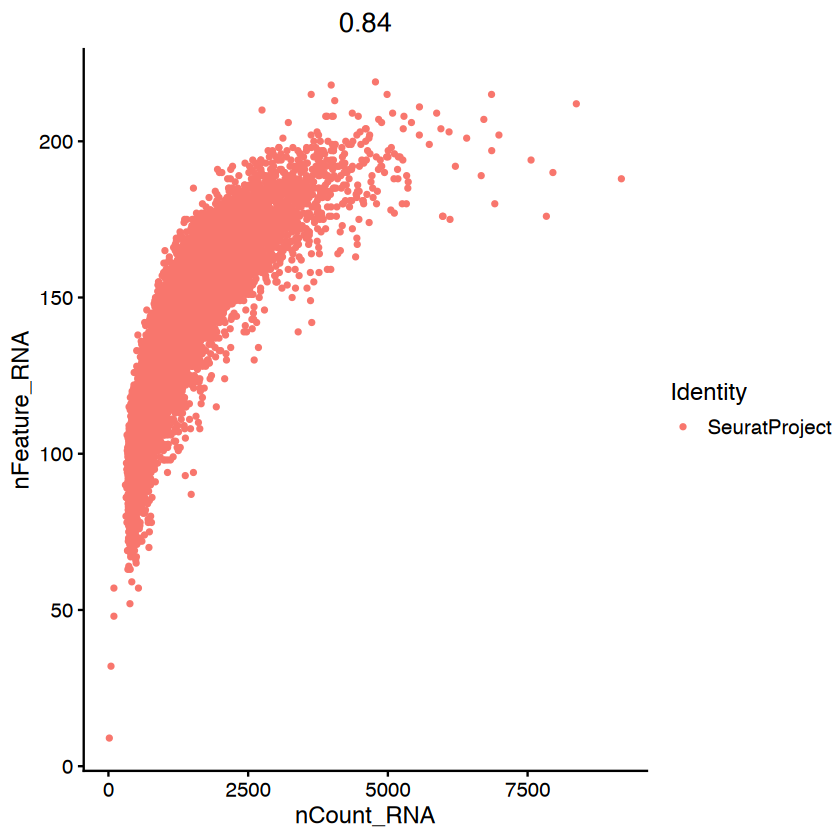

In [6]:
# FeatureScatter Plot QC

# FeatureScatter(merged_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
FeatureScatter(merged_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

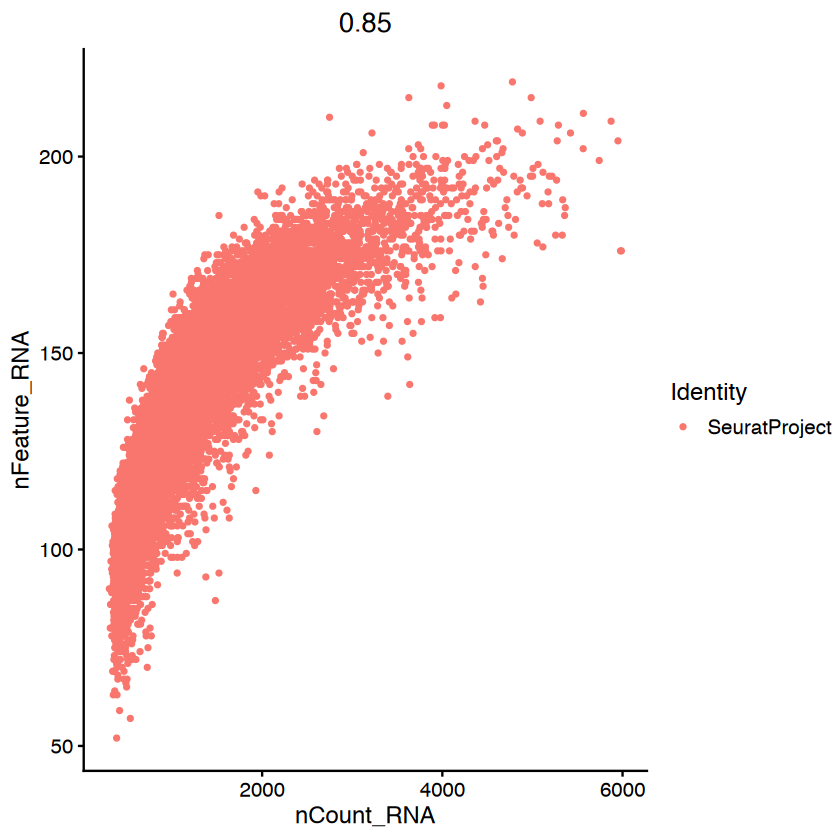

In [7]:
merged_seurat_QC <- subset(merged_seurat, subset = 
                           nCount_RNA > 100 
                           & nCount_RNA < 6000
                           # & percent.mt < 20
                          )
# FeatureScatter(merged_seurat_QC, feature1 = "nCount_RNA", feature2 = "percent.mt")
FeatureScatter(merged_seurat_QC, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [8]:
SCT_merged_seurat <- SCTransform(merged_seurat_QC,
                                # vars.to.regress = "percent.mt", 
                                 verbose = FALSE)
SCT_merged_seurat <- RunPCA(SCT_merged_seurat, npcs = 40, verbose = FALSE)

In [9]:
harmonized_seurat <- IntegrateLayers(
  object = SCT_merged_seurat,
# The following integration method functions are available:
  method = HarmonyIntegration, 
# method = CCAIntegration,
# method = JointPCAIntegration,
# method = RPCAIntegration,
  normalization.method = "SCT",
  verbose = F
)

Warning message:
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Warning message:
“Warning: The parameter tau is deprecated. It will be ignored for this function call and please remove parameter tau in future function calls. Advanced users can set value of parameter tau by using parameter .options and function harmony_options().
This warning is displayed once per session.”
Warning message:
“Warning: The parameter block.size is deprecated. It will be ignored for this function call and please remove parameter block.size in future function calls. Advanced users can set value of parameter block.size by using parameter .options and function harmony_options().
This warning is displayed once per sessi

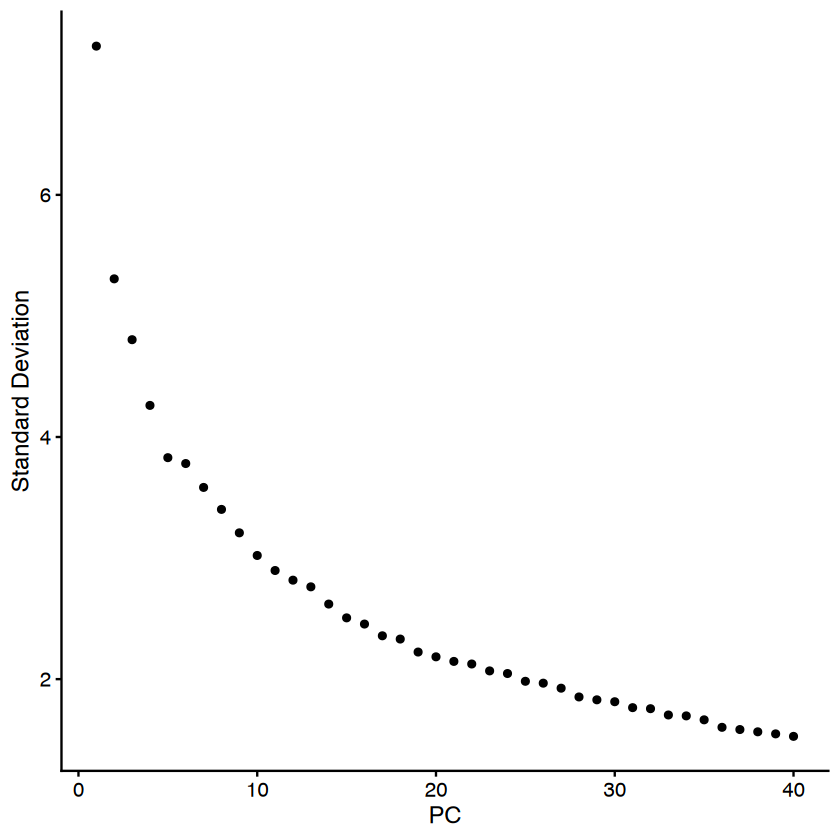

In [10]:
ElbowPlot(harmonized_seurat, ndims = 40, reduction = "pca")

In [11]:
dims = 30 

harmonized_seurat <- FindNeighbors(harmonized_seurat, dims = 1:dims, reduction = "harmony")
harmonized_seurat <- FindClusters(harmonized_seurat, resolution = 0.5)
harmonized_seurat <- RunUMAP(harmonized_seurat, dims = 1:dims, reduction = "harmony")
harmonized_seurat <- PrepSCTFindMarkers(harmonized_seurat, assay = "SCT", verbose = TRUE)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20526
Number of edges: 725917

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8733
Number of communities: 17
Elapsed time: 2 seconds


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:19:37 UMAP embedding parameters a = 0.9922 b = 1.112

В кеше найдено больше одного класса "dist"; использую первый, из пространства имен 'spam'

Также определен в ‘BiocGenerics’

11:19:37 Read 20526 rows and 

[[1]]


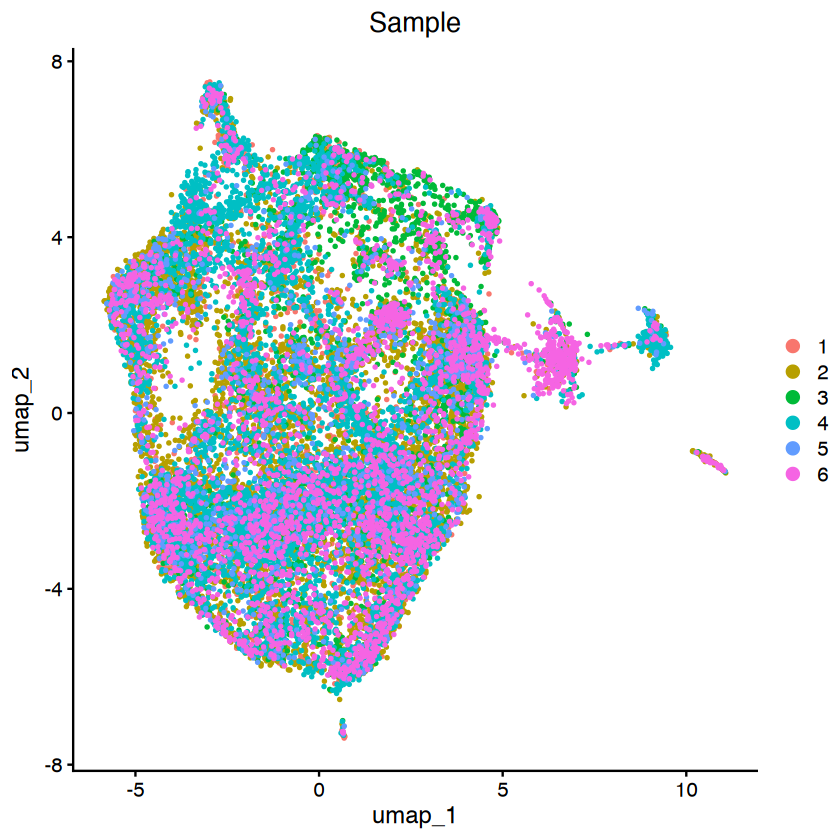

In [12]:
DimPlot(
  harmonized_seurat,
  reduction = "umap",
  group.by = c("Sample"),
  combine = FALSE, 
  pt.size = 0.5, label.size = 0.25
)

ggsave(
  "Cluster QC.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 16.,
  height = 15,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE
)

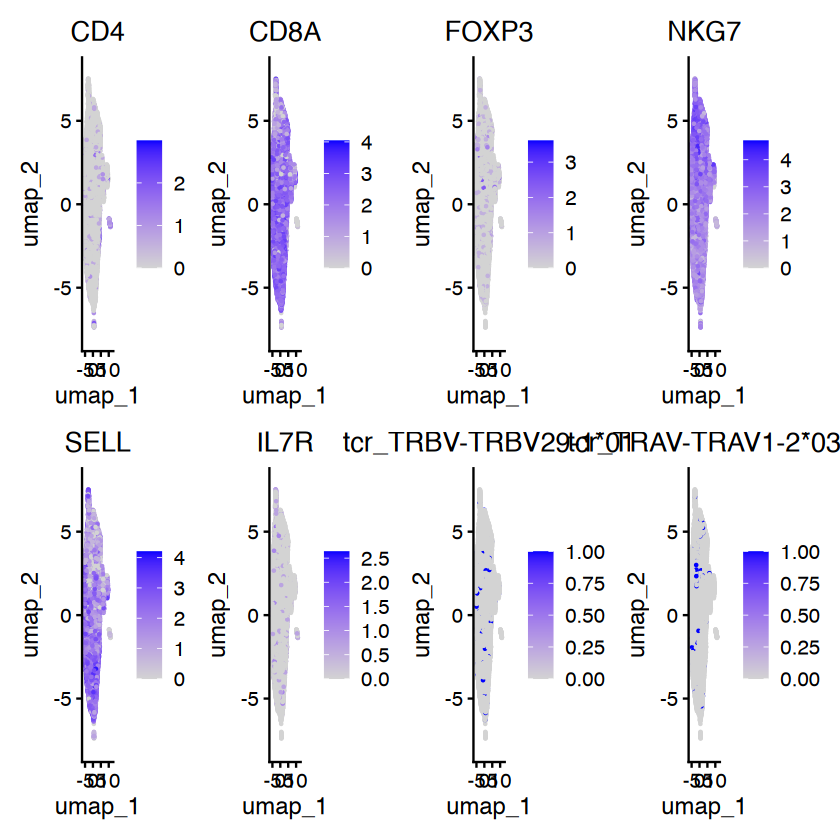

In [14]:
DefaultAssay(harmonized_seurat) <- 'SCT'
FeaturePlot(harmonized_seurat, features = c('CD4','CD8A','FOXP3','NKG7','SELL','IL7R'
                                            ,'tcr_TRBV-TRBV29-1*01'
                                            ,'tcr_TRAV-TRAV1-2*03'
                                           ), 
                  reduction = 'umap', ncol = 4, pt.size = 0.25)

ggsave(
  "T-cell Markers.pdf",
  plot = last_plot(),
  device = "pdf",
  width = 44,
  height = 20,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE
)